# Data Augmentation and Image Pipelines

In [21]:
import numpy as np
from keras.preprocessing import image
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [31]:
train_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range = 0.1,
    zoom_range= 0.3,
    horizontal_flip = True,
)

test_gen = ImageDataGenerator(
    rescale=1/255.0
)

In [44]:
train_generator = train_image_gen.flow_from_directory(
    "images/",
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

val_generator = train_image_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

Found 580 images belonging to 4 classes.
Found 228 images belonging to 4 classes.


In [45]:
#train_gen.class_indices



In [47]:
#for (x,y) in train_gen:
#    print(x.shape,y.shape)
#    for i in range(10):
#        plt.imshow(x[i])
#        plt.show()
    
#break

In [40]:
from keras.layers import *
from keras.models import Sequential

In [41]:
#model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [42]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator



adam=optimizers.Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['acc'])

In [48]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    steps_per_epoch = 7,
    validation_data= val_generator,
    validation_steps = 4
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
7/7 [==============================] - 6s 835ms/step - loss: 1.3728 - acc: 0.3080 - val_loss: 1.3796 - val_acc: 0.2578
Epoch 2/50
7/7 [==============================] - 5s 771ms/step - loss: 1.3943 - acc: 0.2634 - val_loss: 1.3804 - val_acc: 0.3203
Epoch 3/50
7/7 [==============================] - 6s 824ms/step - loss: 1.3787 - acc: 0.2991 - val_loss: 1.3852 - val_acc: 0.2266
Epoch 4/50
7/7 [==============================] - 6s 837ms/step - loss: 1.3798 - acc: 0.2545 - val_loss: 1.3705 - val_acc: 0.3359
Epoch 5/50
7/7 [==============================] - 6s 882ms/step - loss: 1.3812 - acc: 0.2500 - val_loss: 1.3782 - val_acc: 0.2266
Epoch 6/50
7/7 [==============================] - 5s 778ms/step - loss: 1.3743 - acc: 0.2755 - val_loss: 1.3699 - val_acc: 0.2812
Epoch 7/50
7/7 [==============================] - 5s 738ms/step - loss: 1.3703 - acc: 0.2653 - val_loss: 1.3686 - val_acc: 0.3438
Epoch 8/50
7/7

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']


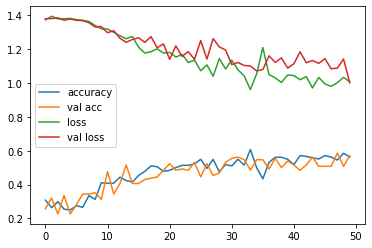

In [51]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()